<a href="https://colab.research.google.com/github/abirakm/Texas-Department-of-Criminal-Justice-Record/blob/main/02_EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
# Read Clean Data and replace space in column name with a underscore
TDCJ_Data = pd.read_csv("https://raw.githubusercontent.com/abirakm/Texas-Department-of-Criminal-Justice-Record/main/TDCJ_Data_clean.csv")
TDCJ_Data.head()

,Inmate_Type,Gender,Race,County,Offense,Sentence_Years,Offense_Description,Case_Duration_Days,Sentence_Year,Offense_Year,Age_at_Offence
0,ID,M,B,Dallas,Property,21 to 25 Years,BURGLARY OF HABITATION,79.0,1983,1983,73
1,ID,M,B,Dallas,Property,31 to 40 Years,BURGLARY OF HABITATION,50.0,1992,1992,73
2,ID,M,B,Dallas,Property,26 to 30 Years,BURGLARY OF HABITATION,29.0,1985,1985,72
3,ID,M,H,Bexar,Property,Life,BURGLARY OF HABITATION,81.0,1986,1986,71
4,ID,M,W,Bell,Property,Life,BURGLARY OF HABITATION,218.0,1981,1980,69


Let's Plot Bar chart for Categorical Data

In [3]:
TDCJ_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91148 entries, 0 to 91147
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Inmate_Type          91148 non-null  object 
 1   Gender               91148 non-null  object 
 2   Race                 91148 non-null  object 
 3   County               91148 non-null  object 
 4   Offense              91148 non-null  object 
 5   Sentence_Years       91148 non-null  object 
 6   Offense_Description  91148 non-null  object 
 7   Case_Duration_Days   91148 non-null  float64
 8   Sentence_Year        91148 non-null  int64  
 9   Offense_Year         91148 non-null  int64  
 10  Age_at_Offence       91148 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 7.6+ MB


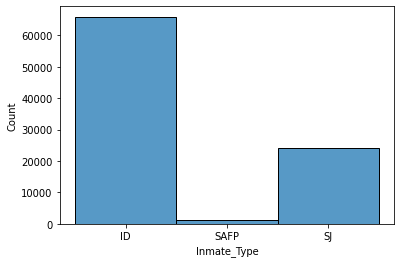

In [ ]:
sns.histplot(TDCJ_Data["Inmate_Type"])

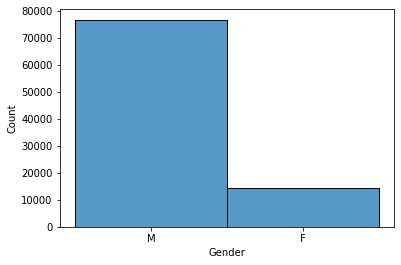

In [ ]:
sns.histplot(TDCJ_Data["Gender"])

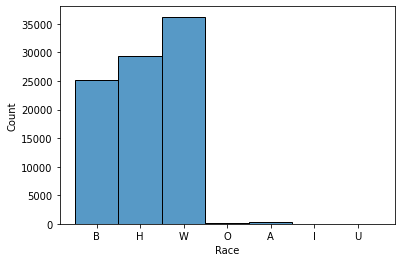

In [ ]:
sns.histplot(TDCJ_Data["Race"])

In [ ]:
TDCJ_Data.groupby('County')['County'].count().sort_values(ascending=False)

County
Harris        11435
Tarrant        7577
Bexar          6490
Dallas         5638
Hidalgo        2561
              ...  
Glasscock         2
Roberts           2
Jeff Davis        2
Briscoe           1
Loving            1
Name: County, Length: 252, dtype: int64

In [ ]:
TDCJ_Data.groupby('Sentence_Years')['Sentence_Years'].count().sort_values(ascending=False)

Sentence_Years
2 Years & Less            15033
3 Years                   10078
5 Years                    8620
4 Years                    7621
6 Months & Less            6527
11 to 12 Months            4360
10 Years                   4312
11 to 15 Years             3863
6 Years                    3426
8 Years                    3182
7 Years                    2595
8 to 9 Months              2414
16 to 20 Years             2085
7 to 8 Months              1647
9 to 10 Months             1615
17 to 18 Months            1441
21 to 25 Years             1398
14 to 15 Months            1386
6 to 7 Months              1238
SAFPF                      1193
23 to 24 Months & More     1044
31 to 40 Years              953
26 to 30 Years              796
13 to 14 Months             678
9 Years                     551
41 to 59 Years              506
15 to 16 Months             450
19 to 20 Months             437
60 Years +                  388
Life                        326
10 to 11 Months          

In [ ]:
TDCJ_Data.groupby('Sentence_Year')['Sentence_Year'].count().sort_values(ascending=False)

Sentence_Year
2019    42950
2018    22163
2020     9592
2017     3459
2016     2809
2015     2174
2014     1643
2013     1194
2012      889
2011      695
2010      506
2009      389
2008      270
2007      215
1992      180
2005      165
1993      161
2006      157
1994      135
1991      131
2004      120
2003      114
1990      110
1989       89
2002       89
1999       88
2001       85
1995       84
2000       78
1996       61
1997       58
1998       52
1988       51
1987       43
1985       32
1986       28
1984       18
1983       17
1981       12
1979       10
1978        9
1982        7
1980        5
1977        3
1971        3
1975        2
1974        2
1973        1
Name: Sentence_Year, dtype: int64

In [ ]:
TDCJ_Data.Case_Duration_Days.describe()

count    91148.000000
mean       542.854314
std        657.680777
min          1.000000
25%        169.000000
50%        330.000000
75%        652.000000
max      13914.000000
Name: Case_Duration_Days, dtype: float64

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



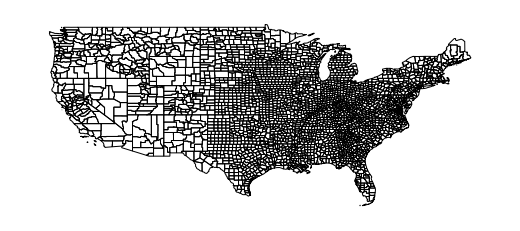

In [ ]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));

In [ ]:
CountyData =  gpd.read_file("https://raw.githubusercontent.com/abirakm/Texas-Department-of-Criminal-Justice-Record/main/Texas%20Counties%20Map.geojson")

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


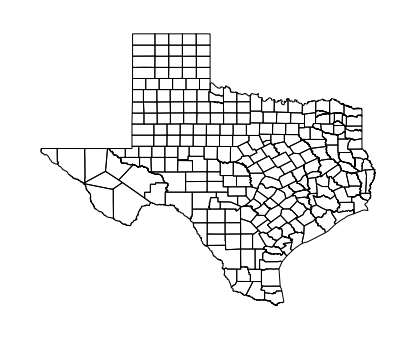

In [ ]:
gplt.polyplot(CountyData);

In [ ]:
CountyData

,name,source,shape_area,date_modif,stratmap_i,txdot_abbr,shape_leng,date_retir,date_creat,cog_abbr,local_id,fips_code,geometry
0,Dallam,DRG,0.391036107,None,,004,2.6477391005,None,1964-01-01T08:00:00+00:00,113,113,111,"MULTIPOLYGON (((-102.53963 36.05514, -102.5834..."
1,Sherman,DRG,0.23975713465,None,,004,1.96801050936,None,1963-01-01T08:00:00+00:00,113,113,421,"MULTIPOLYGON (((-101.62344 36.05539, -101.6341..."
2,Hansford,DRG,0.23918797085,None,,004,1.96553456688,None,1973-01-01T08:00:00+00:00,113,113,195,"MULTIPOLYGON (((-101.08517 36.49986, -101.0851..."
3,Ochiltree,DRG,0.23882832265,None,,004,1.96733065435,None,1972-01-01T08:00:00+00:00,113,113,357,"MULTIPOLYGON (((-100.54607 36.45957, -100.5461..."
4,Lipscomb,DRG,0.24239659585,None,,004,1.97981554464,None,1972-01-01T08:00:00+00:00,113,113,295,"MULTIPOLYGON (((-100.54020 36.05599, -100.5462..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Crosby,DRG,0.226905027,None,,005,1.91322895151,None,1981-01-01T08:00:00+00:00,123,123,107,"MULTIPOLYGON (((-101.03881 33.39715, -101.0892..."
250,Dickens,DRG,0.22769896565,None,,025,1.9206736086,None,1981-01-01T08:00:00+00:00,123,123,125,"MULTIPOLYGON (((-101.04125 33.83363, -101.0006..."
251,King,DRG,0.22995364125,None,,025,1.92823583161,None,1966-01-01T08:00:00+00:00,123,123,269,"MULTIPOLYGON (((-100.04856 33.83598, -100.0299..."
252,Yoakum,DRG,0.2003603496,None,,005,1.79156635058,None,1970-01-01T08:00:00+00:00,123,123,501,"MULTIPOLYGON (((-102.59470 33.38834, -102.5947..."


In [5]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})


In [4]:
import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m